In [1]:
import proplot as plot
import numpy as np
import yaml
import glob
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import sys

import pizza_cutter

logging.basicConfig(stream=sys.stdout)
for code in ["ngmix", "metadetect", "pizza_cutter", "pizza_cutter_sims"]:
    logging.getLogger(code).setLevel(
        getattr(logging, "DEBUG"))

In [8]:
import tempfile
from pizza_cutter_sims.pizza_cutter import run_des_pizza_cutter_coadding_on_sim
from pizza_cutter_sims.sim import generate_sim
from pizza_cutter_sims.constants import PIXEL_SCALE
from pizza_cutter_sims.mdet import run_metadetect

with open(glob.glob("../runs/run0024_*/config.yaml")[0]) as fp:
    cfg = yaml.safe_load(fp.read())

In [9]:
import tqdm

for _ in tqdm.trange(1):
    seeds = np.random.randint(low=1, high=2**29, size=4)
    rng = np.random.RandomState(seed=seeds[0])
    gal_rng = np.random.RandomState(seed=seeds[1])
    coadd_rng = np.random.RandomState(seed=seeds[2])
    mdet_rng = np.random.RandomState(seed=seeds[3])

    data = generate_sim(
        rng=rng,
        gal_rng=gal_rng,
        coadd_config=cfg["coadd"],
        se_config=cfg["se"],
        psf_config=cfg["psf"],
        gal_config=cfg["gal"],
        layout_config=cfg["layout"],
        msk_config=cfg["msk"],
        shear_config=cfg["shear"],
    )

    with tempfile.TemporaryDirectory() as tmpdir:
        cdata = run_des_pizza_cutter_coadding_on_sim(
            rng=coadd_rng,
            tmpdir=tmpdir,
            single_epoch_config=cfg["pizza_cutter"]["single_epoch_config"],
            **data,
        )

    res = run_metadetect(
        rng=mdet_rng,
        config=cfg["metadetect"],
        wcs=data["info"]["affine_wcs"],
        image=cdata["image"],
        bmask=cdata["bmask"],
        ormask=cdata["ormask"],
        noise=cdata["noise"],
        psf=cdata["psf"],
        weight=cdata["weight"],
        mfrac=cdata["mfrac"],
    )


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:pizza_cutter_sims.wcs:generated wcs: galsim.AffineTransform(0.2582378845954364, 8.346752773274057e-05, 8.346752773274057e-05, 0.25853420919734493, origin=galsim.PositionD(x=233.78718189913909, y=234.27400312277598), world_origin=galsim.PositionD(x=0.0, y=0.0))
DEBUG:pizza_cutter_sims.psf:psf config: {'type': 'Gaussian', 'fwhm': 0.9591741946667324, 'shear': {'type': 'G1G2', 'g1': 0.0, 'g2': 0.0}}
DEBUG:pizza_cutter_sims.psf:galsim psf: galsim.Gaussian(sigma=0.40732377690208)
DEBUG:pizza_cutter_sims.gals:using 'exp-dim' gal type w/ mag 22.0
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for coadd/coadd
INFO:pizza_cutter.des_pizza_cutter._load_info:loading image data products for epoch0/epoch0
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:generating slice objects for ra,dec = 0.0|0.0
DEBUG:pizza_cutter.des_pizza_cutter._coadd_slices:found possible image epoch0/epoch0
INFO:pizza_cutter.des_pizza_cutter._coadd_slices:images found in rough cut: 1
INFO:pizz

DEBUG:metadetect.fitting:        wmom s2n: 13.0609 Trat: 1.40185
DEBUG:metadetect.fitting:        wmom s2n: 15.5059 Trat: 1.33662
DEBUG:metadetect.fitting:        wmom s2n: 15.2154 Trat: 1.44089
DEBUG:metadetect.fitting:        wmom s2n: 15.2003 Trat: 1.39678
DEBUG:metadetect.fitting:        wmom s2n: 12.5465 Trat: 1.46429
DEBUG:metadetect.fitting:        wmom s2n: 13.83 Trat: 1.50397
DEBUG:metadetect.fitting:        wmom s2n: 12.3721 Trat: 1.31119
DEBUG:metadetect.fitting:        wmom s2n: 13.5041 Trat: 1.52776
DEBUG:metadetect.fitting:        wmom s2n: 13.8575 Trat: 1.46026
DEBUG:metadetect.fitting:        wmom s2n: 14.3319 Trat: 1.40381
DEBUG:metadetect.fitting:        wmom s2n: 14.3472 Trat: 1.42085
DEBUG:metadetect.fitting:        wmom s2n: 14.0211 Trat: 1.34855
DEBUG:metadetect.fitting:        wmom s2n: 13.78 Trat: 1.45558
DEBUG:metadetect.fitting:        wmom s2n: 12.7215 Trat: 1.29563
DEBUG:metadetect.fitting:        wmom s2n: 14.1428 Trat: 1.49609
DEBUG:metadetect.fitting:    

DEBUG:metadetect.fitting:        wmom s2n: 13.1526 Trat: 1.37827
DEBUG:metadetect.fitting:        wmom s2n: 13.4865 Trat: 1.51025
DEBUG:metadetect.fitting:        wmom s2n: 11.9024 Trat: 1.34159
DEBUG:metadetect.fitting:        wmom s2n: 13.9242 Trat: 1.42677
DEBUG:metadetect.fitting:        wmom s2n: 13.8815 Trat: 1.46994
DEBUG:metadetect.fitting:        wmom s2n: 14.3247 Trat: 1.39268
DEBUG:metadetect.fitting:        wmom s2n: 13.9367 Trat: 1.37276
DEBUG:metadetect.fitting:        wmom s2n: 14.3524 Trat: 1.43362
DEBUG:metadetect.fitting:        wmom s2n: 13.3674 Trat: 1.47665
DEBUG:metadetect.fitting:        wmom s2n: 13.0154 Trat: 1.29752
DEBUG:metadetect.fitting:        wmom s2n: 14.4539 Trat: 1.42591
DEBUG:metadetect.fitting:        wmom s2n: 13.7619 Trat: 1.40418
DEBUG:metadetect.fitting:        wmom s2n: 13.989 Trat: 1.31086
DEBUG:metadetect.fitting:        wmom s2n: 15.7407 Trat: 1.37403
DEBUG:metadetect.fitting:        wmom s2n: 14.0389 Trat: 1.54397
DEBUG:metadetect.fitting: 

DEBUG:metadetect.fitting:        wmom s2n: 13.655 Trat: 1.50844
DEBUG:metadetect.fitting:        wmom s2n: 13.541 Trat: 1.52275
DEBUG:metadetect.fitting:        wmom s2n: 14.052 Trat: 1.30964
DEBUG:metadetect.fitting:        wmom s2n: 13.9622 Trat: 1.4602
DEBUG:metadetect.fitting:        wmom s2n: 12.6695 Trat: 1.36769
DEBUG:metadetect.fitting:        wmom s2n: 13.9871 Trat: 1.43122
DEBUG:metadetect.fitting:        wmom s2n: 4.34067 Trat: 0.910881
DEBUG:metadetect.fitting:        wmom s2n: 12.0799 Trat: 1.3197
DEBUG:metadetect.fitting:        wmom s2n: 14.1377 Trat: 1.47277
DEBUG:metadetect.fitting:        wmom s2n: 14.6927 Trat: 1.35521
DEBUG:metadetect.fitting:        wmom s2n: 13.6525 Trat: 1.44741
DEBUG:metadetect.fitting:        wmom s2n: 16.6865 Trat: 1.41307
DEBUG:metadetect.fitting:        wmom s2n: 13.4526 Trat: 1.48995
DEBUG:metadetect.fitting:        wmom s2n: 12.5998 Trat: 1.414
DEBUG:metadetect.fitting:        wmom s2n: 12.2473 Trat: 1.28443
DEBUG:metadetect.fitting:      

DEBUG:metadetect.fitting:        wmom s2n: 14.4194 Trat: 1.34903
DEBUG:metadetect.fitting:        wmom s2n: 14.6778 Trat: 1.38325
DEBUG:metadetect.fitting:        wmom s2n: 14.1356 Trat: 1.32313
DEBUG:metadetect.fitting:        wmom s2n: 14.2814 Trat: 1.4465
DEBUG:metadetect.fitting:        wmom s2n: 13.7331 Trat: 1.24833
DEBUG:metadetect.fitting:        wmom s2n: 14.5655 Trat: 1.19822
DEBUG:metadetect.fitting:        wmom s2n: 14.3723 Trat: 1.3298
DEBUG:metadetect.fitting:        wmom s2n: 13.6121 Trat: 1.42834
DEBUG:metadetect.fitting:        wmom s2n: 15.8802 Trat: 1.43692
DEBUG:metadetect.fitting:        wmom s2n: 13.7142 Trat: 1.10487
DEBUG:metadetect.fitting:        wmom s2n: 12.4551 Trat: 1.42711
DEBUG:metadetect.fitting:        wmom s2n: 13.4946 Trat: 1.55905
DEBUG:metadetect.fitting:        wmom s2n: 13.5091 Trat: 1.33635
DEBUG:metadetect.fitting:        wmom s2n: 14.1287 Trat: 1.45731
DEBUG:metadetect.fitting:        wmom s2n: 15.1588 Trat: 1.52561
DEBUG:metadetect.fitting:  

DEBUG:metadetect.fitting:        wmom s2n: 13.3558 Trat: 1.54217
DEBUG:metadetect.fitting:        wmom s2n: 12.6889 Trat: 1.31901
DEBUG:metadetect.fitting:        wmom s2n: 14.2807 Trat: 1.46571
DEBUG:metadetect.fitting:        wmom s2n: 13.5379 Trat: 1.3389
DEBUG:metadetect.fitting:        wmom s2n: 13.99 Trat: 1.42489
DEBUG:metadetect.fitting:        wmom s2n: 15.881 Trat: 1.43189
DEBUG:metadetect.fitting:        wmom s2n: 14.9373 Trat: 1.42634
DEBUG:metadetect.fitting:        wmom s2n: 12.9643 Trat: 1.32325
DEBUG:metadetect.fitting:        wmom s2n: 12.9621 Trat: 1.20744
DEBUG:metadetect.fitting:        wmom s2n: 14.4855 Trat: 1.52115
DEBUG:metadetect.fitting:        wmom s2n: 12.7458 Trat: 1.39918
DEBUG:metadetect.fitting:        wmom s2n: 15.3559 Trat: 1.33359
DEBUG:metadetect.fitting:        wmom s2n: 13.7555 Trat: 1.59533
DEBUG:metadetect.fitting:        wmom s2n: 12.7647 Trat: 1.38894
DEBUG:metadetect.fitting:        wmom s2n: 13.4423 Trat: 1.35022
DEBUG:metadetect.fitting:    

100%|██████████| 1/1 [00:10<00:00, 10.58s/it]


In [10]:
print(seeds)

[  7987971 349261694 304815962 202274075]


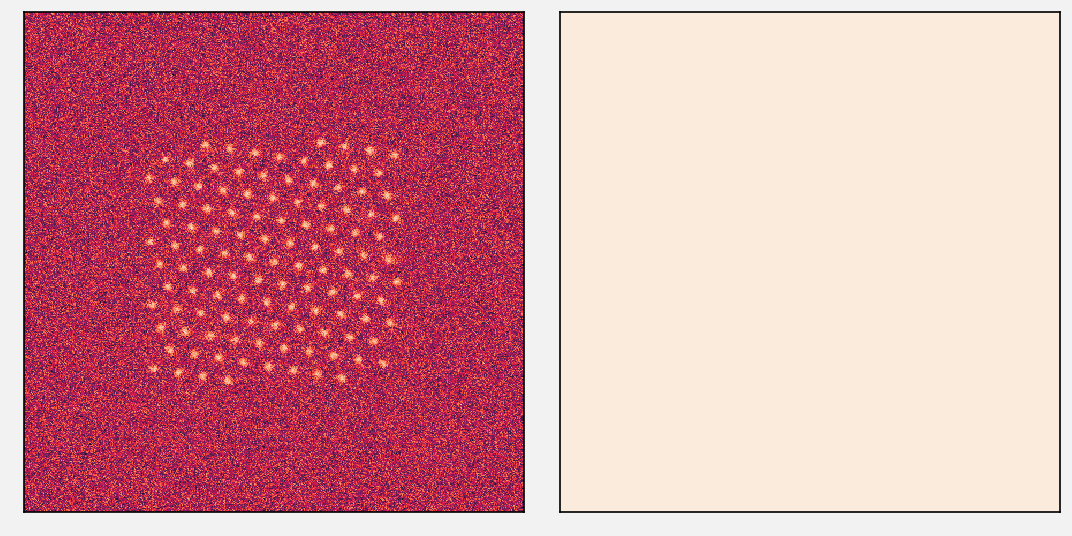

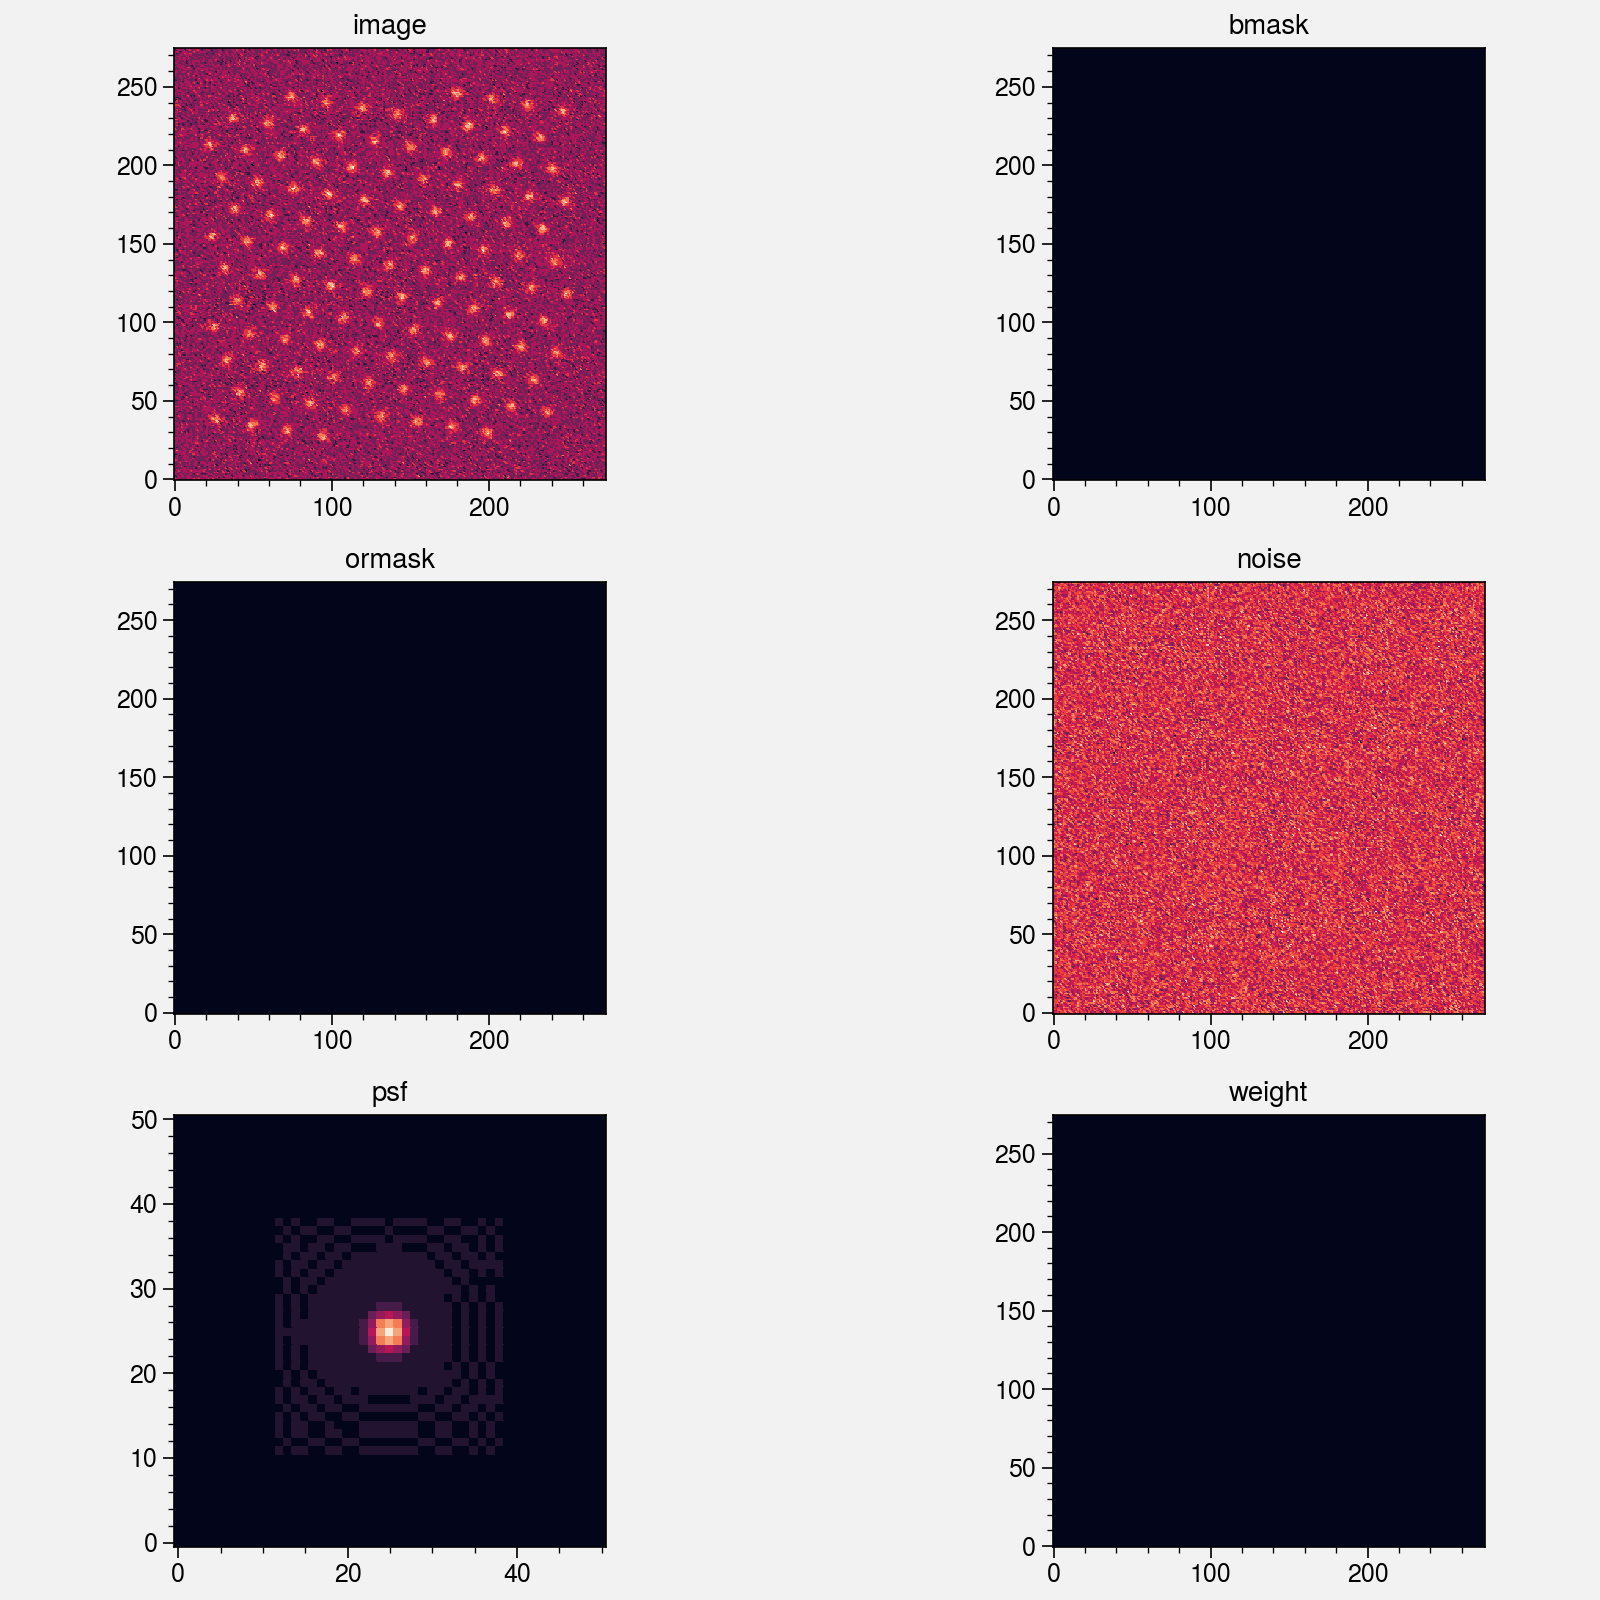

In [11]:
fig, axs = plot.subplots(nrows=len(data["img"]), ncols=2)

for i in range(len(data["img"])):
    axs[i, 0].pcolormesh(np.arcsinh(data["img"][i]*np.sqrt(data["wgt"][i])), cmap="rocket")
    axs[i, 0].set_aspect(1)
    axs[i, 0].xaxis.set_visible(False)
    axs[i, 0].yaxis.set_visible(False)
    axs[i, 1].pcolormesh(data["msk"][i], cmap="rocket_r")
    axs[i, 1].set_aspect(1)
    axs[i, 1].xaxis.set_visible(False)
    axs[i, 1].yaxis.set_visible(False)
    
fig, axs = plot.subplots(nrows=3, ncols=2, figsize=(8, 8), share=0)

for i, key in enumerate(["image", "bmask", "ormask", "noise", "psf", "weight"]):
    axs[i].pcolormesh(cdata[key], cmap="rocket")
    axs[i].set_aspect(1)
    axs[i].set_title(key)

/Users/beckermr/miniconda3/envs/desy6/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'masked fraction')

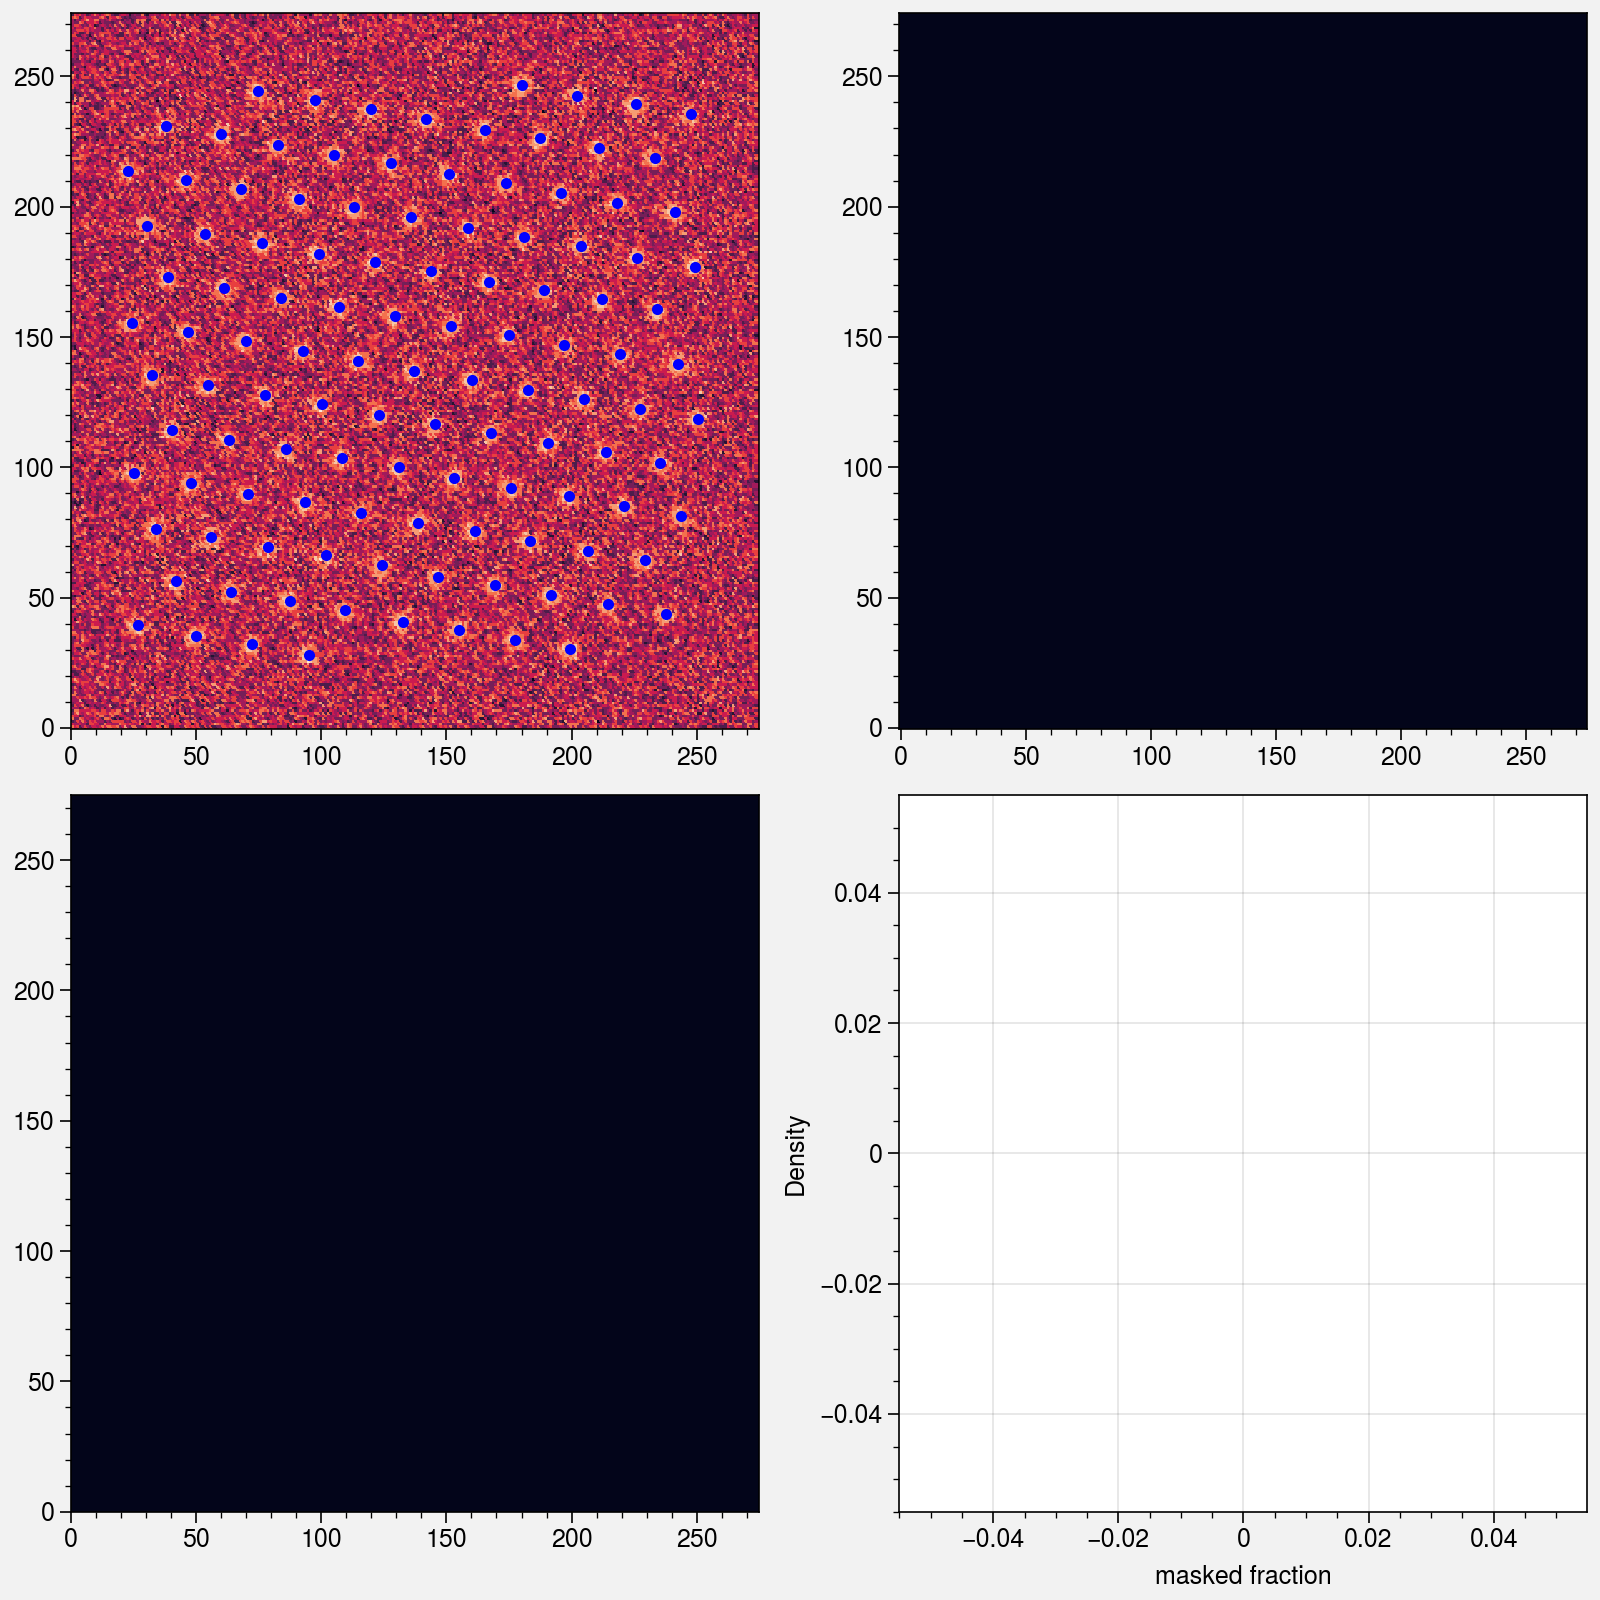

In [12]:
from scipy.interpolate import griddata

fig, axs = plot.subplots(nrows=2, ncols=2, figsize=(8, 8), share=0)

msk = res["noshear"]["ormask"] != 0
mmsk = res["noshear"]["mfrac"] > 0.1

axs[0, 0].pcolormesh(np.arcsinh(cdata["image"]* np.sqrt(cdata["weight"])), cmap="rocket")
axs[0, 0].plot(res["noshear"]["sx_col"], res["noshear"]["sx_row"], ".", color="blue")
axs[0, 0].plot(res["noshear"]["sx_col"][msk], res["noshear"]["sx_row"][msk], "o", color="orange")
axs[0, 0].plot(res["noshear"]["sx_col"][mmsk], res["noshear"]["sx_row"][mmsk], ".", color="yellow")
axs[0, 0].set_xlim(0, cdata["image"].shape[0])
axs[0, 1].pcolormesh(cdata["ormask"], cmap="rocket")

xyvals = np.linspace(0, cdata["image"].shape[0], 50)
gx, gy = np.meshgrid(xyvals, xyvals)
gx = gx.ravel()
gy = gy.ravel()
zvals = griddata(
    np.array([
        res["noshear"]["sx_col"], 
        res["noshear"]["sx_row"], 
    ]).T,
    res["noshear"]["mfrac"],
    np.array([gx, gy]).T,
    fill_value=0,
).reshape(xyvals.shape[0], xyvals.shape[0])

axs[1, 0].pcolormesh(xyvals, xyvals, zvals, cmap='rocket', vmin=0, vmax=1)
axs[1, 0].set_xlim(0, cdata["image"].shape[0])
axs[1, 0].set_ylim(0, cdata["image"].shape[0])

sns.kdeplot(res["noshear"]["mfrac"], ax=axs[1, 1], cut=0, bw_adjust=0.1)
axs[1, 1].set_xlabel("masked fraction")